In [2]:
import os
import requests
from zipfile import ZipFile

data_dir = "/home/jovyan/data/citibike/"
os.makedirs(data_dir, exist_ok=True)

files = [
    "2017-citibike-tripdata.zip",
    "2018-citibike-tripdata.zip",
    "2019-citibike-tripdata.zip",
]

base_url = "https://s3.amazonaws.com/tripdata/"

for file_name in files:
    zip_path = os.path.join(data_dir, file_name)
    if not os.path.exists(zip_path):
        print(f"Pobieranie {file_name} …")
        r = requests.get(base_url + file_name, stream=True)
        if r.status_code == 200:
            with open(zip_path, "wb") as f:
                for chunk in r.iter_content(8192):
                    f.write(chunk)
            print(f"Pobrano {file_name}")
        else:
            print(f"Błąd pobierania: {r.status_code}")
    else:
        print(f"{file_name} już istnieje, pomijam pobieranie")

    print(f"Rozpakowywanie {file_name} …")
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    print(f"Gotowe: {file_name}\n")


Pobieranie 2017-citibike-tripdata.zip …
Pobrano 2017-citibike-tripdata.zip
Rozpakowywanie 2017-citibike-tripdata.zip …
Gotowe: 2017-citibike-tripdata.zip

Pobieranie 2018-citibike-tripdata.zip …
Pobrano 2018-citibike-tripdata.zip
Rozpakowywanie 2018-citibike-tripdata.zip …
Gotowe: 2018-citibike-tripdata.zip

Pobieranie 2019-citibike-tripdata.zip …
Pobrano 2019-citibike-tripdata.zip
Rozpakowywanie 2019-citibike-tripdata.zip …
Gotowe: 2019-citibike-tripdata.zip



In [ ]:
#delete zip files
import os
import glob

zip_files = glob.glob("/home/jovyan/data/citibike/*.zip")
for f in zip_files:
    os.remove(f)

In [ ]:
#delete files other than month library (4_April etc)

import os
import shutil

base_path = "/home/jovyan/data/citibike/"

for year_dir in os.listdir(base_path):
    year_path = os.path.join(base_path, year_dir)
    if os.path.isdir(year_path):
        # iteracja po elementach w katalogu rocznym
        for item in os.listdir(year_path):
            item_path = os.path.join(year_path, item)
            if not os.path.isdir(item_path):
                print(f"Usuwam plik: {item_path}")
                os.remove(item_path)


Usuwam plik: /home/jovyan/data/citibike/2017-citibike-tripdata/.DS_Store
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/.DS_Store
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201801-citibike-tripdata.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201802-citibike-tripdata.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201803-citibike-tripdata.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201804-citibike-tripdata.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201804-citibike-tripdata_1.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201804-citibike-tripdata_2.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201805-citibike-tripdata.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201806-citibike-tripdata.csv
Usuwam plik: /home/jovyan/data/citibike/2018-citibike-tripdata/201807-citibike-tripdata.csv
Usuwam plik: /home/jov

In [ ]:
import os
import pandas as pd

# katalog z danymi Citibike
base_path = "/home/jovyan/data/citibike/"

# katalog, gdzie zapiszemy scalone dane
output_path = "/home/jovyan/data/citibike_merged/"
os.makedirs(output_path, exist_ok=True)

# wzorcowe kolumny
standard_cols = [
    'tripduration', 'starttime', 'stoptime', 'start station id', 'start station name',
    'start station latitude', 'start station longitude', 'end station id', 'end station name',
    'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender'
]

# iterujemy po rocznikach
for year_dir in sorted(os.listdir(base_path)):
    year_path = os.path.join(base_path, year_dir)
    if os.path.isdir(year_path):
        print(f"Wczytywanie danych dla: {year_dir}")
        year_dfs = []

        # iteracja po podkatalogach miesięcznych
        for month_dir in sorted(os.listdir(year_path)):
            month_path = os.path.join(year_path, month_dir)
            if os.path.isdir(month_path):
                # wczytujemy wszystkie CSV w podkatalogu miesiąca
                for csv_file in sorted(os.listdir(month_path)):
                    if csv_file.endswith(".csv"):
                        file_path = os.path.join(month_path, csv_file)
                        print(f"  - {file_path}")
                        df = pd.read_csv(file_path)

                        # dla roku 2017 filtrujemy tylko standardowe kolumny
                        if "2017" in year_dir:
                            df = df[[c for c in df.columns if c in standard_cols]]

                        year_dfs.append(df)

        # scalanie wszystkich miesięcy w jeden DataFrame roczny
        if year_dfs:
            year_df = pd.concat(year_dfs, ignore_index=True)
            print(f"Scalone dane dla {year_dir}: {year_df.shape}")

            # # zapis do CSV
            csv_out = os.path.join(output_path, f"{year_dir}.csv")
            year_df.to_csv(csv_out, index=False)
            print(f"Zapisano CSV: {csv_out}")

            # zapis do Parquet
            parquet_out = os.path.join(output_path, f"{year_dir}.parquet")
            year_df.to_parquet(parquet_out, index=False)
            print(f"Zapisano Parquet: {parquet_out}")


Wczytywanie danych dla: 2018-citibike-tripdata
  - /home/jovyan/data/citibike/2018-citibike-tripdata/10_October/201810-citibike-tripdata_1.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/10_October/201810-citibike-tripdata_2.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/11_November/201811-citibike-tripdata_1.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/11_November/201811-citibike-tripdata_2.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/12_December/201812-citibike-tripdata_1.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/12_December/201812-citibike-tripdata_2.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/1_January/201801-citibike-tripdata_1.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/2_February/201802-citibike-tripdata_1.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/3_March/201803-citibike-tripdata_1.csv
  - /home/jovyan/data/citibike/2018-citibike-tripdata/4_April/201804-citibike-tripdata_1.

In [2]:
import time
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("CitiBike Analysis") \
    .getOrCreate()

# Wczytywanie CSV
start = time.time()
df_2017_csv = spark.read.option("header", "true").csv("/home/jovyan/data/citibike_merged/2017-citibike-tripdata.csv")
print(f"df_2017_csv: {time.time() - start} s")

start = time.time()
df_2018_csv = spark.read.option("header", "true").csv("/home/jovyan/data/citibike_merged/2018-citibike-tripdata.csv")
print(f"df_2018_csv: {time.time() - start} s")

start = time.time()
df_2019_csv = spark.read.option("header", "true").csv("/home/jovyan/data/citibike_merged/2019-citibike-tripdata.csv")
print(f"df_2019_csv: {time.time() - start} s")

# Wczytywanie Parquet
start = time.time()
df_2017_parquet = spark.read.parquet("/home/jovyan/data/citibike_merged/2017-citibike-tripdata.parquet")
print(f"df_2017_parquet: {time.time() - start} s")

start = time.time()
df_2018_parquet = spark.read.parquet("/home/jovyan/data/citibike_merged/2018-citibike-tripdata.parquet")
print(f"df_2018_parquet: {time.time() - start} s")

start = time.time()
df_2019_parquet = spark.read.parquet("/home/jovyan/data/citibike_merged/2019-citibike-tripdata.parquet")
print(f"df_2019_parquet: {time.time() - start} s")

df_2017_csv: 5.392726182937622 s
df_2018_csv: 0.4837055206298828 s
df_2019_csv: 0.4638023376464844 s
df_2017_parquet: 0.692631721496582 s
df_2018_parquet: 0.18791723251342773 s
df_2019_parquet: 0.18320083618164062 s


In [3]:
# Lista DF
dfs = {
    "2017": df_2017_csv,
    "2017_p": df_2017_parquet,
    "2018": df_2018_csv,
    "2018_p": df_2018_parquet,
    "2019": df_2019_csv,
    "2019_p": df_2019_parquet,    
}

clean_dfs = {}

for name, df in dfs.items():

    before = df.count()   # liczba rekordów przed

    start = time.time()
    
    df_clean = df.na.drop("any")
    df_clean.count()
    cleaning_time = time.time() - start

    after = df_clean.count()  # liczba rekordów po

    clean_dfs[name] = df_clean  # zapis oczyszczonego df

    print(f"{name}: przed = {before}, po = {after}, czas czyszczenia = {cleaning_time:.3f} s")

# Tworzenie widoków SQL na oczyszczonych danych
for name, df in clean_dfs.items():
    df.createOrReplaceTempView(f"clean_{name}")


2017: przed = 16364657, po = 12599579, czas czyszczenia = 46.481 s
2017_p: przed = 16364657, po = 12599579, czas czyszczenia = 8.839 s
2018: przed = 17548339, po = 17545842, czas czyszczenia = 46.888 s
2018_p: przed = 17548339, po = 17545842, czas czyszczenia = 12.665 s
2019: przed = 20551697, po = 20551517, czas czyszczenia = 48.126 s
2019_p: przed = 20551697, po = 20551517, czas czyszczenia = 12.387 s


Zapytania

1. Liczba przejazdów w każdym roku

In [33]:
query = """
SELECT '2017' AS year, COUNT(*) AS trips FROM clean_2017_p
UNION ALL
SELECT '2018', COUNT(*) FROM clean_2018_p
UNION ALL
SELECT '2019', COUNT(*) FROM clean_2019_p
"""

start = time.time()

trips_per_year = spark.sql(query)
trips_per_year.show()

execution_time = time.time() - start

print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+----+--------+
|year|   trips|
+----+--------+
|2017|12599579|
|2018|17545842|
|2019|20551517|
+----+--------+

Czas wykonania zapytania SQL: 10.791 s


In [ ]:
import time

query = """
SELECT '2017' AS year, COUNT(*) AS trips FROM clean_2017
UNION ALL
SELECT '2018', COUNT(*) FROM clean_2018
UNION ALL
SELECT '2019', COUNT(*) FROM clean_2019
"""

start = time.time()

trips_per_year = spark.sql(query)
trips_per_year.show()

execution_time = time.time() - start

print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+----+--------+
|year|   trips|
+----+--------+
|2017|12599579|
|2018|17545842|
|2019|20551517|
+----+--------+

Czas wykonania zapytania SQL: 86.226 s


/tmp/ipykernel_2814/1697280931.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='trips', data=trips_per_year_pd, palette="Greens_d")


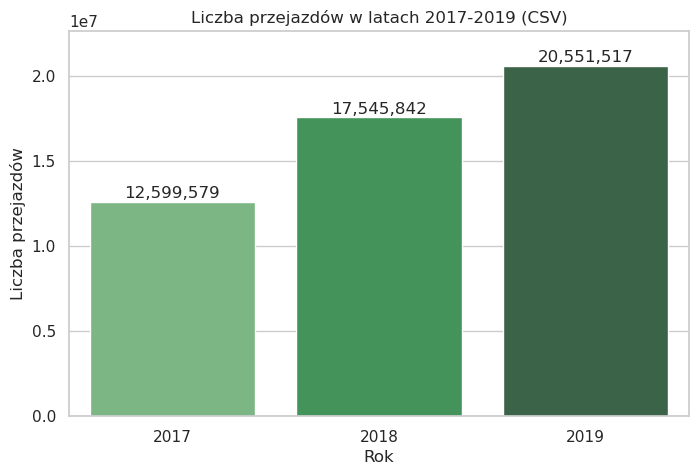

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

trips_per_year_pd = trips_per_year.toPandas()

trips_per_year_pd['year'] = trips_per_year_pd['year'].astype(str)

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.barplot(x='year', y='trips', data=trips_per_year_pd, palette="Greens_d")

plt.title("Liczba przejazdów w latach 2017-2019 (CSV)")
plt.xlabel("Rok")
plt.ylabel("Liczba przejazdów")
plt.ylim(0, trips_per_year_pd['trips'].max() * 1.1)

for index, row in trips_per_year_pd.iterrows():
    plt.text(index, row.trips + 50000, f"{row.trips:,}", 
             ha='center', va='bottom')

plt.show()


2. Średni czas przejazdu (minuty) w każdym roku

In [37]:
query = """
SELECT
    YEAR(TO_TIMESTAMP(starttime)) AS year,
    AVG(tripduration)/60 AS avg_duration_min
FROM clean_2017_p
GROUP BY 1
UNION ALL
SELECT
    YEAR(TO_TIMESTAMP(starttime)),
    AVG(tripduration)/60
FROM clean_2018_p
GROUP BY 1
UNION ALL
SELECT
    YEAR(TO_TIMESTAMP(starttime)),
    AVG(tripduration)/60
FROM clean_2019_p
GROUP BY 1
"""
start = time.time()

avg_duration = spark.sql(query)
avg_duration.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+----+------------------+
|year|  avg_duration_min|
+----+------------------+
|2017|15.377246659061651|
|2018|16.474576435260275|
|2019|16.304074881674186|
+----+------------------+

Czas wykonania zapytania SQL na parquet: 21.209 s


In [38]:
query = """
SELECT
    YEAR(TO_TIMESTAMP(starttime)) AS year,
    AVG(tripduration)/60 AS avg_duration_min
FROM clean_2017
GROUP BY 1
UNION ALL
SELECT
    YEAR(TO_TIMESTAMP(starttime)),
    AVG(tripduration)/60
FROM clean_2018
GROUP BY 1
UNION ALL
SELECT
    YEAR(TO_TIMESTAMP(starttime)),
    AVG(tripduration)/60
FROM clean_2019
GROUP BY 1
"""
start = time.time()

avg_duration = spark.sql(query)
avg_duration.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+----+------------------+
|year|  avg_duration_min|
+----+------------------+
|2017|15.377246659061651|
|2018|16.474576435260275|
|2019|16.304074881674186|
+----+------------------+

Czas wykonania zapytania SQL na CVS: 132.866 s


/tmp/ipykernel_2814/3228617482.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='avg_duration_min', data=avg_duration_pd, palette="Blues_d")


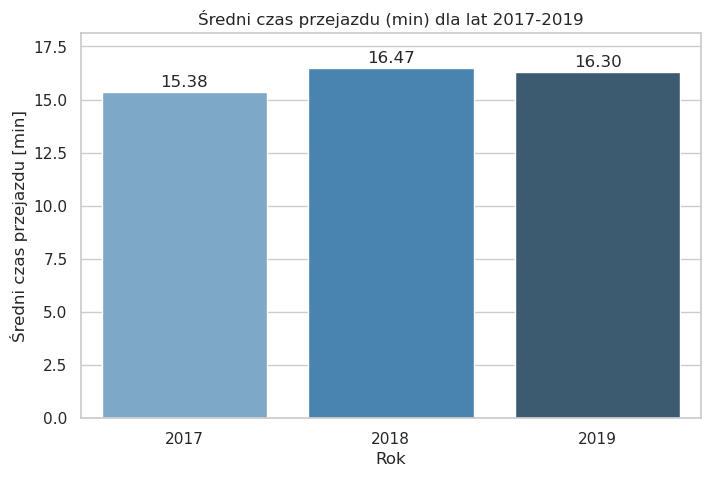

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_duration_pd = avg_duration.toPandas()

avg_duration_pd['year'] = avg_duration_pd['year'].astype(str)

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.barplot(x='year', y='avg_duration_min', data=avg_duration_pd, palette="Blues_d")

plt.title("Średni czas przejazdu (min) dla lat 2017-2019")
plt.xlabel("Rok")
plt.ylabel("Średni czas przejazdu [min]")
plt.ylim(0, avg_duration_pd['avg_duration_min'].max() * 1.1)

for index, row in avg_duration_pd.iterrows():
    plt.text(index, row.avg_duration_min + 0.1, f"{row.avg_duration_min:.2f}", 
             ha='center', va='bottom')

plt.show()


3. TOP 10 najpopularniejszych stacji startowych (2019)

In [40]:
query = """
SELECT `start station name` AS station, COUNT(*) AS trips
FROM clean_2019_p
GROUP BY 1
ORDER BY trips DESC
LIMIT 10
"""

start = time.time()

top_stations_2019 = spark.sql(query)
top_stations_2019.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+--------------------+------+
|             station| trips|
+--------------------+------+
|Pershing Square N...|156575|
|  E 17 St & Broadway|121781|
|     8 Ave & W 31 St|119958|
|  Broadway & E 22 St|113138|
|  Broadway & E 14 St|113012|
|     W 21 St & 6 Ave|110305|
|West St & Chamber...|105636|
|  Broadway & W 60 St|103167|
|Christopher St & ...|101413|
|    12 Ave & W 40 St| 99300|
+--------------------+------+

Czas wykonania zapytania SQL na parquet: 8.738 s


In [42]:
query = """
SELECT `start station name` AS station, COUNT(*) AS trips
FROM clean_2019
GROUP BY 1
ORDER BY trips DESC
LIMIT 10
"""

start = time.time()

top_stations_2019 = spark.sql(query)
top_stations_2019.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+--------------------+------+
|             station| trips|
+--------------------+------+
|Pershing Square N...|156575|
|  E 17 St & Broadway|121781|
|     8 Ave & W 31 St|119958|
|  Broadway & E 22 St|113138|
|  Broadway & E 14 St|113012|
|     W 21 St & 6 Ave|110305|
|West St & Chamber...|105636|
|  Broadway & W 60 St|103167|
|Christopher St & ...|101413|
|    12 Ave & W 40 St| 99300|
+--------------------+------+

Czas wykonania zapytania SQL na CSV: 35.890 s


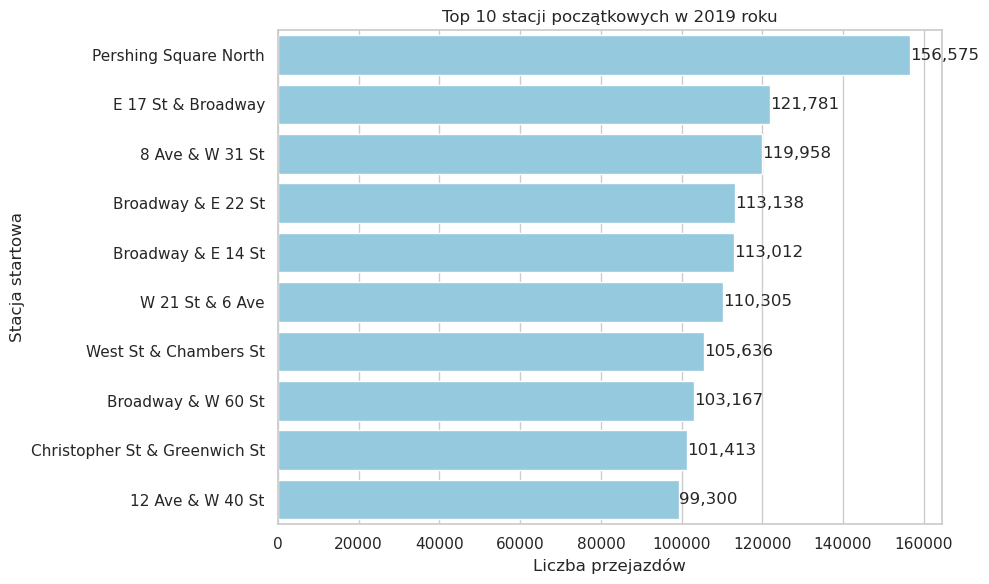

In [57]:
top_stations_pd = top_stations_2019.toPandas()

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(
    x='trips', 
    y='station', 
    data=top_stations_pd, 
    color='skyblue'
)

plt.title("Top 10 stacji początkowych w 2019 roku")
plt.xlabel("Liczba przejazdów")
plt.ylabel("Stacja startowa")

for index, row in top_stations_pd.iterrows():
    plt.text(row.trips + 50, index, f"{row.trips:,}", va='center')

plt.tight_layout()
plt.show()

4. Liczba przejazdów wg typu użytkownika w 2019 roku

In [64]:
query = """
SELECT usertype, COUNT(*) AS trips
FROM clean_2019_p
GROUP BY usertype
ORDER BY trips DESC
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+----------+--------+
|  usertype|   trips|
+----------+--------+
|Subscriber|17679393|
|  Customer| 2872124|
+----------+--------+

Czas wykonania zapytania SQL na parquet: 5.359 s


In [79]:
query = """
SELECT usertype, COUNT(*) AS trips
FROM clean_2019
GROUP BY usertype
ORDER BY trips DESC
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+----------+--------+
|  usertype|   trips|
+----------+--------+
|Subscriber|17679393|
|  Customer| 2872124|
+----------+--------+

Czas wykonania zapytania SQL na CSV: 51.889 s


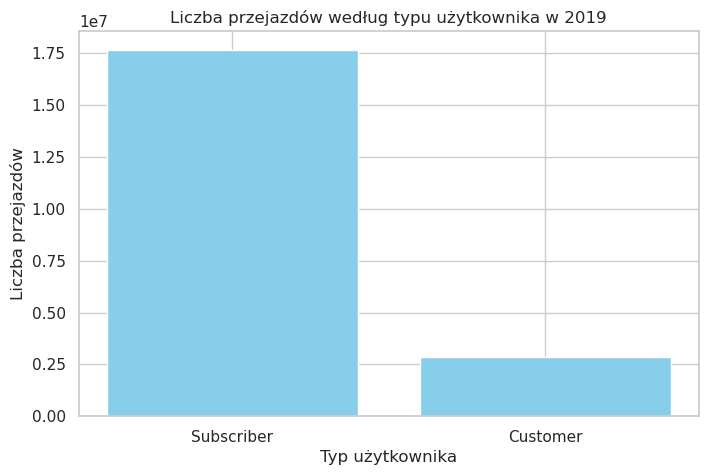

In [66]:
import matplotlib.pyplot as plt

pdf = result.toPandas()

plt.figure(figsize=(8,5))
plt.bar(pdf['usertype'], pdf['trips'], color='skyblue')
plt.xlabel('Typ użytkownika')
plt.ylabel('Liczba przejazdów')
plt.title('Liczba przejazdów według typu użytkownika w 2019')
plt.xticks(rotation=0)
plt.show()


5. Liczba przejazdów wg płci w 2018 roku

In [67]:
query = """
SELECT gender, COUNT(*) AS trips
FROM clean_2018_p
GROUP BY gender
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+------+--------+
|gender|   trips|
+------+--------+
|     0| 1484282|
|     1|11969615|
|     2| 4091945|
+------+--------+

Czas wykonania zapytania SQL na parquet: 4.659 s


In [80]:
query = """
SELECT gender, COUNT(*) AS trips
FROM clean_2018
GROUP BY gender
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+------+--------+
|gender|   trips|
+------+--------+
|     0| 1484282|
|     1|11969615|
|     2| 4091945|
+------+--------+

Czas wykonania zapytania SQL na CSV: 44.375 s


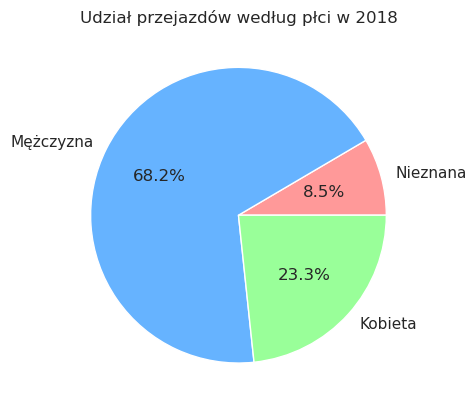

In [75]:
import matplotlib.pyplot as plt

pdf = result.toPandas()

colors = ['#ff9999', '#66b3ff', '#99ff99']

labels = ['Nieznana', 'Mężczyzna', 'Kobieta']
plt.title('Udział przejazdów według płci w 2018')
plt.pie(pdf['trips'], labels=labels, autopct='%1.1f%%', colors=colors)

plt.show()


6. Porównanie średniego czasu przejazdu weekend vs. dzień roboczy (2018)

In [76]:
query = """
SELECT 
    CASE WHEN DAYOFWEEK(TO_TIMESTAMP(starttime)) IN (1,7) THEN 'Weekend' ELSE 'Weekday' END AS day_type,
    AVG(tripduration)/60 AS avg_duration_min
FROM clean_2018_p
GROUP BY day_type
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+--------+------------------+
|day_type|  avg_duration_min|
+--------+------------------+
| Weekday|15.510544801945965|
| Weekend|19.504958141274702|
+--------+------------------+

Czas wykonania zapytania SQL na parquet: 6.011 s


In [81]:
query = """
SELECT 
    CASE WHEN DAYOFWEEK(TO_TIMESTAMP(starttime)) IN (1,7) THEN 'Weekend' ELSE 'Weekday' END AS day_type,
    AVG(tripduration)/60 AS avg_duration_min
FROM clean_2018
GROUP BY day_type
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+--------+------------------+
|day_type|  avg_duration_min|
+--------+------------------+
| Weekday|15.510544801945965|
| Weekend|19.504958141274702|
+--------+------------------+

Czas wykonania zapytania SQL na CSV: 46.177 s


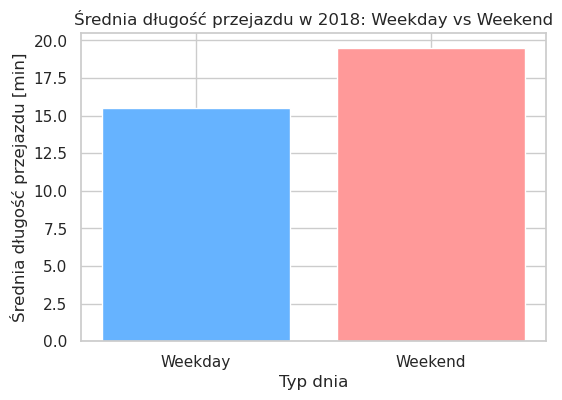

In [78]:
import matplotlib.pyplot as plt

pdf = result.toPandas()

plt.figure(figsize=(6,4))
plt.bar(pdf['day_type'], pdf['avg_duration_min'], color=['#66b3ff', '#ff9999'])
plt.xlabel('Typ dnia')
plt.ylabel('Średnia długość przejazdu [min]')
plt.title('Średnia długość przejazdu w 2018: Weekday vs Weekend')
plt.show()

7. Najbardziej zatłoczone stacje w godzinach szczytu (7–9, 16–18) w 2019

In [82]:
query = """
SELECT `start station name`, COUNT(*) AS trips
FROM clean_2019_p
WHERE HOUR(TO_TIMESTAMP(starttime)) BETWEEN 7 AND 9
   OR HOUR(TO_TIMESTAMP(starttime)) BETWEEN 16 AND 18
GROUP BY `start station name`
ORDER BY trips DESC
LIMIT 10
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+--------------------+-----+
|  start station name|trips|
+--------------------+-----+
|Pershing Square N...|96468|
|  Broadway & E 22 St|58699|
|  E 47 St & Park Ave|58204|
|     8 Ave & W 31 St|58043|
|    12 Ave & W 40 St|52278|
|  E 17 St & Broadway|52240|
|Christopher St & ...|52073|
|West St & Chamber...|50629|
|     W 21 St & 6 Ave|48661|
|     8 Ave & W 33 St|45813|
+--------------------+-----+

Czas wykonania zapytania SQL na parquet: 17.922 s


In [83]:
query = """
SELECT `start station name`, COUNT(*) AS trips
FROM clean_2019
WHERE HOUR(TO_TIMESTAMP(starttime)) BETWEEN 7 AND 9
   OR HOUR(TO_TIMESTAMP(starttime)) BETWEEN 16 AND 18
GROUP BY `start station name`
ORDER BY trips DESC
LIMIT 10
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+--------------------+-----+
|  start station name|trips|
+--------------------+-----+
|Pershing Square N...|96468|
|  Broadway & E 22 St|58699|
|  E 47 St & Park Ave|58204|
|     8 Ave & W 31 St|58043|
|    12 Ave & W 40 St|52278|
|  E 17 St & Broadway|52240|
|Christopher St & ...|52073|
|West St & Chamber...|50629|
|     W 21 St & 6 Ave|48661|
|     8 Ave & W 33 St|45813|
+--------------------+-----+

Czas wykonania zapytania SQL na CSV: 61.947 s


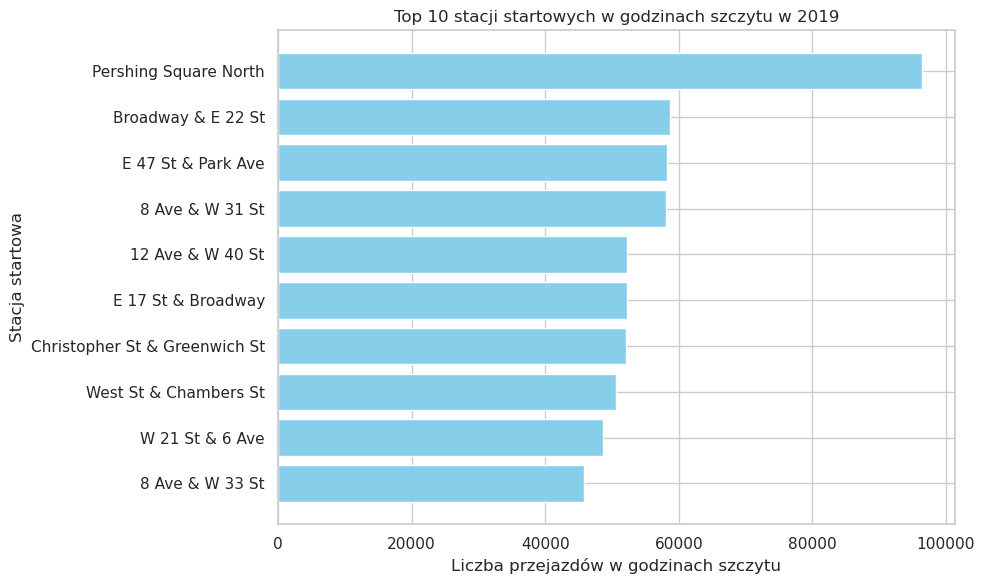

In [84]:
import matplotlib.pyplot as plt

pdf = result.toPandas()

plt.figure(figsize=(10,6))
plt.barh(pdf['start station name'][::-1], pdf['trips'][::-1], color='skyblue')
plt.xlabel('Liczba przejazdów w godzinach szczytu')
plt.ylabel('Stacja startowa')
plt.title('Top 10 stacji startowych w godzinach szczytu w 2019')
plt.tight_layout()
plt.show()


8. 5 rowerów, które pokonały najdłuższą łączną odległość (zakładając dystans z współrzędnych)

In [86]:
query = """
SELECT bikeid, SUM(
    6371 * 2 * ASIN(SQRT(
        POWER(SIN(RADIANS(`end station latitude` - `start station latitude`) / 2), 2) +
        COS(RADIANS(`start station latitude`)) * COS(RADIANS(`end station latitude`)) *
        POWER(SIN(RADIANS(`end station longitude` - `start station longitude`) / 2), 2)
    ))
) AS total_km
FROM clean_2018_p
GROUP BY bikeid
ORDER BY total_km DESC
LIMIT 5
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+------+------------------+
|bikeid|          total_km|
+------+------------------+
| 30657| 5272.779775103837|
| 32124|4989.3040460571165|
| 32541| 4919.629544311813|
| 32036|4887.7849860552205|
| 32090|4796.4494671505345|
+------+------------------+

Czas wykonania zapytania SQL na parquet: 6.890 s


In [87]:
query = """
SELECT bikeid, SUM(
    6371 * 2 * ASIN(SQRT(
        POWER(SIN(RADIANS(`end station latitude` - `start station latitude`) / 2), 2) +
        COS(RADIANS(`start station latitude`)) * COS(RADIANS(`end station latitude`)) *
        POWER(SIN(RADIANS(`end station longitude` - `start station longitude`) / 2), 2)
    ))
) AS total_km
FROM clean_2018
GROUP BY bikeid
ORDER BY total_km DESC
LIMIT 5
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+------+------------------+
|bikeid|          total_km|
+------+------------------+
| 30657| 5272.779775103837|
| 32124|4989.3040460571165|
| 32541|4919.6295443118115|
| 32036| 4887.784986055221|
| 32090|4796.4494671505345|
+------+------------------+

Czas wykonania zapytania SQL na CSV: 45.535 s


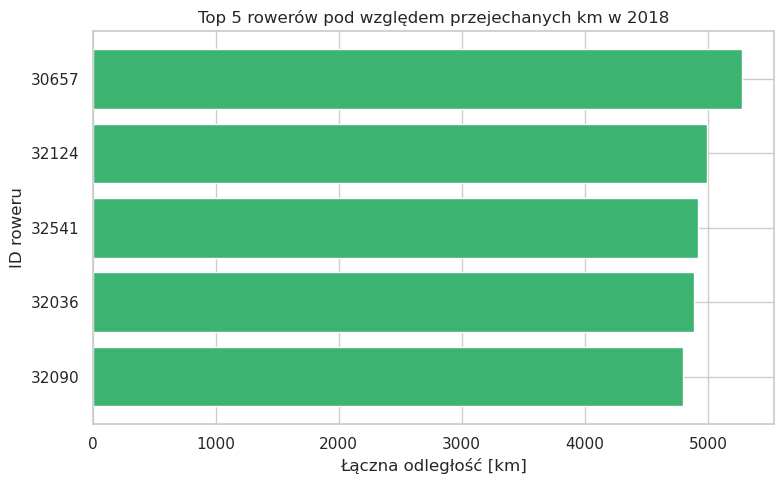

In [88]:
import matplotlib.pyplot as plt

pdf = result.toPandas()

plt.figure(figsize=(8,5))
plt.barh(pdf['bikeid'][::-1], pdf['total_km'][::-1], color='mediumseagreen')
plt.xlabel('Łączna odległość [km]')
plt.ylabel('ID roweru')
plt.title('Top 5 rowerów pod względem przejechanych km w 2018')
plt.tight_layout()
plt.show()

9. Trend liczby przejazdów w czasie (tygodnie) w 2018 roku

In [96]:
query = """
SELECT WEEKOFYEAR(TO_TIMESTAMP(starttime)) AS week, COUNT(*) AS trips
FROM clean_2018_p
GROUP BY week
ORDER BY week
"""
start = time.time()

result = spark.sql(query)
result.show(n=52, truncate=False)

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+----+------+
|week|trips |
+----+------+
|1   |84209 |
|2   |155538|
|3   |181527|
|4   |220412|
|5   |190289|
|6   |166723|
|7   |222762|
|8   |217616|
|9   |247840|
|10  |204044|
|11  |222179|
|12  |204361|
|13  |273192|
|14  |221790|
|15  |331887|
|16  |325321|
|17  |354321|
|18  |442460|
|19  |424930|
|20  |338198|
|21  |413949|
|22  |419463|
|23  |450713|
|24  |476293|
|25  |457761|
|26  |440387|
|27  |392281|
|28  |477435|
|29  |441753|
|30  |411116|
|31  |451480|
|32  |438579|
|33  |418085|
|34  |486930|
|35  |441546|
|36  |421495|
|37  |432613|
|38  |474972|
|39  |433031|
|40  |484151|
|41  |429992|
|42  |410376|
|43  |362582|
|44  |426254|
|45  |313180|
|46  |266742|
|47  |223743|
|48  |277439|
|49  |293350|
|50  |266479|
|51  |233198|
|52  |148875|
+----+------+

Czas wykonania zapytania SQL na parquet: 8.574 s


In [97]:
query = """
SELECT WEEKOFYEAR(TO_TIMESTAMP(starttime)) AS week, COUNT(*) AS trips
FROM clean_2018
GROUP BY week
ORDER BY week
"""
start = time.time()

result = spark.sql(query)
result.show(n=52, truncate=False)

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+----+------+
|week|trips |
+----+------+
|1   |84209 |
|2   |155538|
|3   |181527|
|4   |220412|
|5   |190289|
|6   |166723|
|7   |222762|
|8   |217616|
|9   |247840|
|10  |204044|
|11  |222179|
|12  |204361|
|13  |273192|
|14  |221790|
|15  |331887|
|16  |325321|
|17  |354321|
|18  |442460|
|19  |424930|
|20  |338198|
|21  |413949|
|22  |419463|
|23  |450713|
|24  |476293|
|25  |457761|
|26  |440387|
|27  |392281|
|28  |477435|
|29  |441753|
|30  |411116|
|31  |451480|
|32  |438579|
|33  |418085|
|34  |486930|
|35  |441546|
|36  |421495|
|37  |432613|
|38  |474972|
|39  |433031|
|40  |484151|
|41  |429992|
|42  |410376|
|43  |362582|
|44  |426254|
|45  |313180|
|46  |266742|
|47  |223743|
|48  |277439|
|49  |293350|
|50  |266479|
|51  |233198|
|52  |148875|
+----+------+

Czas wykonania zapytania SQL na CSV: 47.356 s


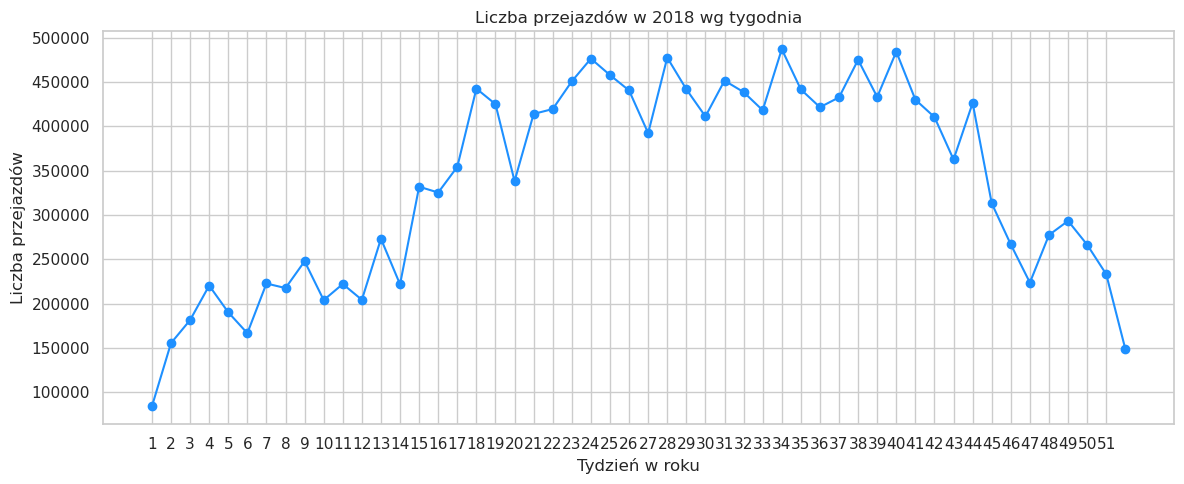

In [98]:
import matplotlib.pyplot as plt

pdf = result.toPandas()

plt.figure(figsize=(12,5))
plt.plot(pdf['week'], pdf['trips'], marker='o', color='dodgerblue')
plt.xlabel('Tydzień w roku')
plt.ylabel('Liczba przejazdów')
plt.title('Liczba przejazdów w 2018 wg tygodnia')
plt.grid(True)
plt.xticks(range(1, 52))
plt.tight_layout()
plt.show()


10. Najpopularniejsze trasy (start → end) w 2019 roku

In [4]:
query = """
SELECT 
    `start station name`, 
    `end station name`, 
    COUNT(*) AS trips
FROM clean_2019_p
GROUP BY `start station name`, `end station name`
ORDER BY trips DESC
LIMIT 10
"""
start = time.time()

result = spark.sql(query)
result.show()

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na parquet: {execution_time:.3f} s")

+--------------------+--------------------+-----+
|  start station name|    end station name|trips|
+--------------------+--------------------+-----+
|   E 7 St & Avenue A|Cooper Square & A...| 8426|
|Central Park S & ...|Central Park S & ...| 6778|
|Central Park S & ...|     5 Ave & E 88 St| 6092|
|North Moore St & ...|Vesey Pl & River ...| 5366|
|West Drive & Pros...|West Drive & Pros...| 5364|
|Vesey Pl & River ...|North Moore St & ...| 5274|
|    12 Ave & W 40 St|West St & Chamber...| 5056|
|Pershing Square N...|E 24 St & Park Ave S| 5051|
|McGuinness Blvd &...|Vernon Blvd & 50 Ave| 4999|
|    Soissons Landing|    Soissons Landing| 4971|
+--------------------+--------------------+-----+

Czas wykonania zapytania SQL na parquet: 16.444 s


In [5]:
query = """
SELECT 
    `start station name`, 
    `end station name`, 
    COUNT(*) AS trips
FROM clean_2019
GROUP BY `start station name`, `end station name`
ORDER BY trips DESC
LIMIT 10
"""
start = time.time()

result = spark.sql(query)
result.show(n=52, truncate=False)

execution_time = time.time() - start
print(f"Czas wykonania zapytania SQL na CSV: {execution_time:.3f} s")

+-------------------------------+-------------------------------+-----+
|start station name             |end station name               |trips|
+-------------------------------+-------------------------------+-----+
|E 7 St & Avenue A              |Cooper Square & Astor Pl       |8426 |
|Central Park S & 6 Ave         |Central Park S & 6 Ave         |6778 |
|Central Park S & 6 Ave         |5 Ave & E 88 St                |6092 |
|North Moore St & Greenwich St  |Vesey Pl & River Terrace       |5366 |
|West Drive & Prospect Park West|West Drive & Prospect Park West|5364 |
|Vesey Pl & River Terrace       |North Moore St & Greenwich St  |5274 |
|12 Ave & W 40 St               |West St & Chambers St          |5056 |
|Pershing Square North          |E 24 St & Park Ave S           |5051 |
|McGuinness Blvd & Eagle St     |Vernon Blvd & 50 Ave           |4999 |
|Soissons Landing               |Soissons Landing               |4971 |
+-------------------------------+-------------------------------

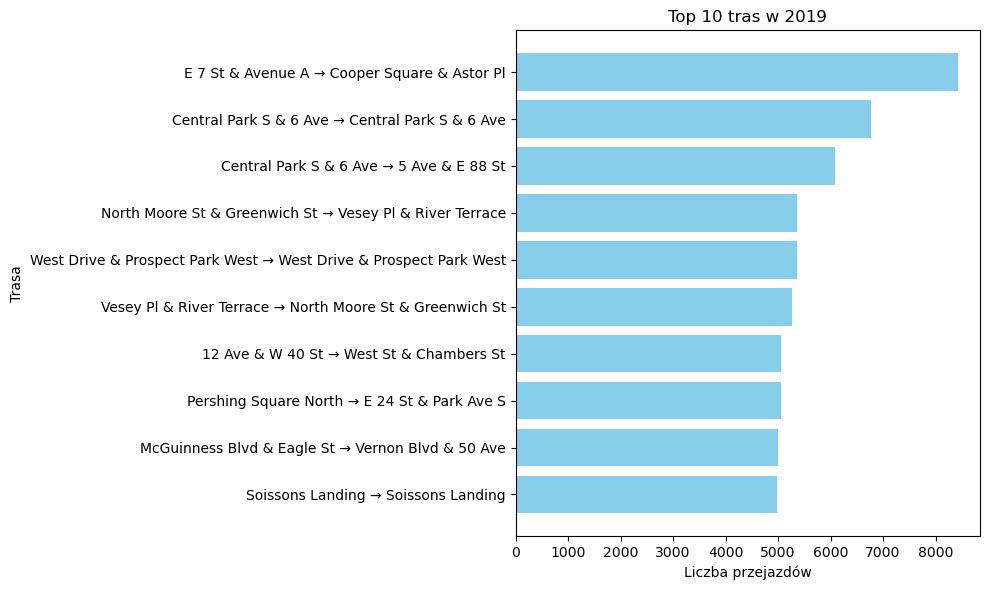

In [6]:
import matplotlib.pyplot as plt

pdf = result.toPandas()

pdf['route'] = pdf['start station name'] + ' → ' + pdf['end station name']

plt.figure(figsize=(10,6))
plt.barh(pdf['route'][::-1], pdf['trips'][::-1], color='skyblue')
plt.xlabel('Liczba przejazdów')
plt.ylabel('Trasa')
plt.title('Top 10 tras w 2019')
plt.tight_layout()
plt.show()

Pozostałe testy

In [51]:
def benchmark(action, repeat=3):
    times = []
    for _ in range(repeat):
        start = time.time()
        action()
        times.append(time.time() - start)
    return sum(times) / repeat

read_tests = {}

for name, df in clean_dfs.items():
    print(f"Test: {name}")

    def action():
        df.count()

    avg_time = benchmark(action)
    read_tests[name] = avg_time

# Wyświetlenie wyników
read_tests

Test: 2017
Test: 2017_p
Test: 2018
Test: 2018_p
Test: 2019
Test: 2019_p


{'2017': 25.149114847183228,
 '2017_p': 5.047790606816609,
 '2018': 31.634063561757404,
 '2018_p': 6.593509356180827,
 '2019': 43.88575712839762,
 '2019_p': 8.668524026870728}

In [50]:
query = "SELECT COUNT(*) FROM {}"

query_times = {}

for name in clean_dfs.keys():
    view_name = f"clean_{name}"
    
    def action():
        spark.sql(query.format(view_name)).collect()

    avg_time = benchmark(action)
    query_times[name] = avg_time

query_times

{'2017': 25.55777422587077,
 '2017_p': 5.270348310470581,
 '2018': 41.58060510953268,
 '2018_p': 6.525519688924153,
 '2019': 46.3660044670105,
 '2019_p': 7.732036113739014}

In [62]:
import pandas as pd
results_df = pd.DataFrame({
    "Dataset": list(read_tests.keys()),
    "Read Time (s)": list(read_tests.values()),
    "Query Time (s)": list(query_times.values())
})

results_df

,Dataset,Read Time (s),Query Time (s)
0,2017,25.149115,25.557774
1,2017_p,5.047791,5.270348
2,2018,31.634064,41.580605
3,2018_p,6.593509,6.525520
4,2019,43.885757,46.366004
5,2019_p,8.668524,7.732036


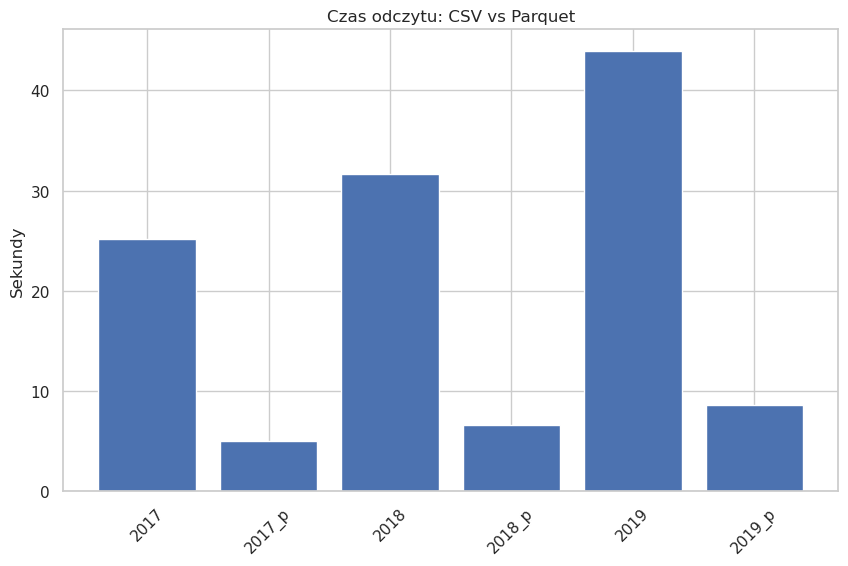

In [63]:
plt.figure(figsize=(10,6))
plt.bar(results_df["Dataset"], results_df["Read Time (s)"])
plt.xticks(rotation=45)
plt.title("Czas odczytu: CSV vs Parquet")
plt.ylabel("Sekundy")
plt.show()
